References <br /> 
https://github.com/iSchool-590pr/PR_Sp20_examples/blob/master/week_07/class7_pandas_pt2.ipynb <br /> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html <br /> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html <br /> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html <br /> 
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html <br /> 
https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value <br /> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html <br /> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html <br /> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html <br />
https://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index<br />
https://stackoverflow.com/questions/49350445/correlation-coefficient-of-two-columns-in-pandas-dataframe-with-corr<br/> 
https://pandas.pydata.org/pandas-docs/version/0.16.0/visualization.html<br />
https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/<br/>   

<br /> 
Data Sources<br /> 
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i<br /> 
https://catalog.data.gov/dataset/nypd-arrests-data-historic<br /> 
https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Neighborhood-Tabulatio/swpk-hqdp<br /> 
https://data.cityofnewyork.us/Public-Safety/EMS-Incident-Dispatch-Data/76xm-jjuj<br /> 
https://worldpopulationreview.com/us-cities/new-york-city-population/ <br/>
https://en.wikipedia.org/wiki/Demographics_of_New_York_City<br/> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Hypothesis 1: 
The number of crimes decreased in neighborhoods where the previous number of arrests is high indicating that maybe the police 
force is handling the situations better.

In [132]:
def dataset_validation():
    """
     
    This function is used to check if the input data files are having the correct column headers that are needed
    for our hypotheses analysis. The files need to be loaded from the local computer directory since they are 
    very large. If the files are not present , then the user can download it from a google drive link provided
    by our team or can go to the official website from which the data was downloaded.
    
    >>> my_dir = 'https://github.com/rahulrohri/final_project_2020Sp/tree/master/DocTest%20Dummy%20Files/'
    >>> NYPD_Arrests = my_dir + 'Arrest_Correct.csv' # Loading NYPD Arrest Data file
    >>> Complaints = my_dir +  'Complaints_Correct.csv' # Loading NYPD Complaints Data file
    >>> EMS_incident = my_dir +  'EMS_Correct.csv' # Loading EMS incident dispatch Data file
    >>> dataset_validation()
    The columns necessary for analysis are present in the EMS data file
    The columns necessary for analysis are present in the Complaints data file
    The columns necessary for analysis are present in the Arrests data file
    """
    my_dir = 'C:/Users/rahul/Downloads/UIUC/Sem 2 - Spring 2020/Courses/Programing Analytics/Final Project/DataSets/' #https://github.com/iSchool-590pr/PR_Sp20_examples/blob/master/week_07/class7_pandas_pt2.ipynb
    NYPD_Arrests = my_dir + 'NYPD_Arrests_Data__Historic_.csv' # Loading NYPD Arrest Data file
    Complaints = my_dir +  'NYPD_Complaint_Data_Historic.csv' # Loading NYPD Complaints Data file
    EMS_incident = my_dir +  'EMS_Incident_Dispatch_Data.csv' # Loading EMS incident dispatch Data file

    
    data_EMS =  pd.read_csv(EMS_incident, nrows=1)
    data_Complaints =  pd.read_csv(Complaints, nrows=1)
    data_Arrest = pd.read_csv(NYPD_Arrests, nrows=1)
    All_Col_list_EMS = list(data_EMS)
    All_Col_list_Complaints = list(data_Complaints)
    All_Col_list_Arrest = list(data_Arrest)

    Req_Complaints_cols = ['CMPLNT_NUM','CMPLNT_FR_DT','BORO_NM','VIC_RACE','OFNS_DESC']
    Req_Arrests_cols = ['ARREST_BORO','ARREST_DATE','ARREST_KEY']
    Req_EMS_cols = ['INCIDENT_RESPONSE_SECONDS_QY','INCIDENT_DATETIME','BOROUGH']

    check_EMS =  all(item in All_Col_list_EMS for item in Req_EMS_cols) #https://www.techbeamers.com/program-python-list-contains-elements/
    if check_EMS is True:
        print("The columns necessary for analysis are present in the EMS data file")    
    else :
        print("The columns necessary for analysis are not present in the EMS data file. Kindly download the dataset files from - https://drive.google.com/open?id=1g_StaWiaWQyNjNOu3wlFKG2dsIJZjyjF or the latest file from https://data.cityofnewyork.us/Public-Safety/EMS-Incident-Dispatch-Data/76xm-jjuj")
    check_Complaints =  all(item in All_Col_list_Complaints for item in Req_Complaints_cols) #https://www.techbeamers.com/program-python-list-contains-elements/
    if check_Complaints is True:
        print("The columns necessary for analysis are present in the Complaints data file")    
    else :
        print("The columns necessary for analysis are not present in the Complaints data file. Kindly download the dataset files from - https://drive.google.com/open?id=112LOH-fYjUn5AHVnFbgQYRAAhSCcXvjq or the latest file from https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i ")

    check_Arrests =  all(item in All_Col_list_Arrest for item in Req_Arrests_cols) #https://www.techbeamers.com/program-python-list-contains-elements/
    if check_Arrests is True:
        print("The columns necessary for analysis are present in the Arrests data file")    
    else :
        print("The columns necessary for analysis are not present in the Arrests data file. Kindly download the dataset files from - https://drive.google.com/open?id=1g_StaWiaWQyNjNOu3wlFKG2dsIJZjyjF or the latest file from https://catalog.data.gov/dataset/nypd-arrests-data-historic")


In [133]:
dataset_validation()

The columns necessary for analysis are present in the EMS data file
The columns necessary for analysis are present in the Complaints data file
The columns necessary for analysis are present in the Arrests data file


In [97]:
def get_file(file,cols) -> pd.DataFrame:
    
    """
    This function produced a dataframe that consists of the columns that are needed fr analysis from a datafile.
    Since in our project we are using between 2 - 4 columns for each hypothesis analysis rather than loading the
    entire data file, the dataframe will end up containing only between 2-4 columns.
    >>> test_file = 'https://github.com/rahulrohri/final_project_2020Sp/blob/master/DocTest%20Dummy%20Files/Airplane.csv'
    >>> answer = get_file(test_file,2)
    >>> answer.iloc[0]['AircraftHex'] #doctest: +NORMALIZE_WHITESPACE
    'A902B5'
    """
    
    if cols == 2:
        col1 = input('enter your column name 1 and press enter: ')
        #print(type(col1))
        col2 = input('enter your column name 2 and press enter: ')
        col_list = [col1,col2]
    elif cols == 3:
        col1 = input('enter your column name 1 and press enter: ')
        #print(type(col1))
        col2 = input('enter your column name 2 and press enter: ')
        col3 = input('enter your column name 3 and press enter: ')
        col_list = [col1,col2,col3]    
    elif cols == 4:
        col1 = input('enter your column name 1 inside and press enter: ')
        col2 = input('enter your column name 2 inside and press enter: ')
        col3 = input('enter your column name 3 inside and press enter: ')
        col4 = input('enter your column name 4 inside and press enter: ')
        col_list = [col1,col2,col3,col4]    
    data_file = pd.read_csv(file,usecols=col_list) # Import only necessary columns from the dataset
    return data_file

In [7]:
NYC_Complaint_Data = get_file(Complaints,3) #Using only column names - CMPLNT_NUM,CMPLNT_FR_DT,BORO_NM
NYC_Complaint_Data

enter your column name 1 and press enter: CMPLNT_NUM
enter your column name 2 and press enter: CMPLNT_FR_DT
enter your column name 3 and press enter: BORO_NM


,CMPLNT_NUM,CMPLNT_FR_DT,BORO_NM
0,522575447,08/29/2006,BRONX
1,403507361,11/05/2006,BROOKLYN
2,631420068,09/08/2006,QUEENS
3,995609899,12/13/2011,BROOKLYN
4,480667624,08/14/2009,MANHATTAN
...,...,...,...
6847939,954636350,08/23/2015,BROOKLYN
6847940,960069040,06/15/2013,MANHATTAN
6847941,131686727,07/12/2012,BRONX
6847942,443513715,04/15/2012,QUEENS


In [96]:
#Extracting the Month and Year of the incident
def extract_year_month(x,old_col:str,month_column:str,year_column:str):
    """
    This function is used to extract the year and the month from an existing dataframe column that 
    contains date values in the format mm/dd/yyyy. The extraction process results in the formation 
    of two new columns in the dataframe - one containing only the months and the other containing only 
    the year values.
    
    :param x: The dataframe on which opeartions are to be performed
    :param old_col: The dataframe column containing date in format mm/dd/yyyy
    :param month_column: The dataframe column to be created post extraction of the month from the column name old_col 
    :param year_column: The dataframe column to be created post extraction of the year from the column name old_col 
    >>> sample_csv = 'https://github.com/rahulrohri/final_project_2020Sp/blob/master/DocTest%20Dummy%20Files/sample_date_func.csv'
    >>> sample_df = pd.read_csv(sample_csv)
    >>> answer = extract_year_month(sample_df,'Date','Month','Year')
    >>> answer.iloc[0]['Population'] #doctest: +NORMALIZE_WHITESPACE
    8300124
    """
    x[month_column] = x[old_col].str[:2]
    x[year_column] = x[old_col].str[6:10]
    return x

In [9]:
extract_year_month(NYC_Complaint_Data,'CMPLNT_FR_DT','Complaint_Filed_Month','Complaint_Filed_Year')

,CMPLNT_NUM,CMPLNT_FR_DT,BORO_NM,Complaint_Filed_Month,Complaint_Filed_Year
0,522575447,08/29/2006,BRONX,08,2006
1,403507361,11/05/2006,BROOKLYN,11,2006
2,631420068,09/08/2006,QUEENS,09,2006
3,995609899,12/13/2011,BROOKLYN,12,2011
4,480667624,08/14/2009,MANHATTAN,08,2009
...,...,...,...,...,...
6847939,954636350,08/23/2015,BROOKLYN,08,2015
6847940,960069040,06/15/2013,MANHATTAN,06,2013
6847941,131686727,07/12/2012,BRONX,07,2012
6847942,443513715,04/15/2012,QUEENS,04,2012


In [95]:
def get_arrest_or_crime_count(dfname,col_year,col_month,col_boro,col_key)-> pd.core.frame.DataFrame:
    
    """
    This function is used to create a multilevel index dataframe that groups the data by the 
    neighbourhood, year , and month columns and finally produces a column of the aggragation
    type as count to display either the total count of arrests or the total count of complaints
    
    :param dfname: The dataframe on which opeartions are to be performed
    :param col_year: Column name containing year value
    :param col_month: Column name containing month value
    :param col_boro:Column name containing borough/area value
    :param col_key: Column name on which aggreagation has to be done
    :return: a dataframe containing year,month,neighbourhood,aggregated column count
    
    >>> sample_csv = 'https://github.com/rahulrohri/final_project_2020Sp/blob/master/DocTest%20Dummy%20Files/arrest_crime_count_function.csv'
    >>> sample_df = pd.read_csv(sample_csv)
    >>> answer = get_arrest_or_crime_count(sample_df,'Complaint_Filed_Year','Complaint_Filed_Month','BORO_NM','CMPLNT_NUM')
    >>> answer.index.levels[1]
    Int64Index([2006, 2009, 2011, 2015], dtype='int64', name='Complaint_Filed_Year')
    """
    
    #replacing Borough initials with complete names
    dfname = dfname.dropna(subset=[col_year])
    dfname = dfname.astype({col_year: 'int64'})
    dfname = dfname[dfname[col_year] > 2005]
    data_count = dfname.groupby([col_boro,col_year,col_month]).agg({col_key: ['count']}) #https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
    return data_count

In [11]:
Crime_count_result = get_arrest_or_crime_count(NYC_Complaint_Data,'Complaint_Filed_Year','Complaint_Filed_Month','BORO_NM','CMPLNT_NUM')
Crime_count_result

CMPLNT_NUM
                                                              count
BORO_NM       Complaint_Filed_Year Complaint_Filed_Month           
BRONX         2006                 01                          9363
                                   02                          7758
                                   03                          9425
                                   04                          8756
                                   05                          9454
...                                                             ...
STATEN ISLAND 2019                 05                          1665
                                   06                          1649
                                   07                          1709
                                   08                          1514
                                   09                          1575

[825 rows x 1 columns]

In [12]:
NYC_Arrest_Data = get_file(NYPD_Arrests,3) #Importing only columns -ARREST_BORO, ARREST_DATE, ARREST_KEY
NYC_Arrest_Data 

enter your column name 1 and press enter: ARREST_BORO
enter your column name 2 and press enter: ARREST_DATE
enter your column name 3 and press enter: ARREST_KEY


,ARREST_KEY,ARREST_DATE,ARREST_BORO
0,173130602,12/31/2017,Q
1,173114463,12/31/2017,Q
2,173113513,12/31/2017,K
3,173113423,12/31/2017,M
4,173113421,12/31/2017,M
...,...,...,...
4798334,173142136,01/01/2018,B
4798335,173135232,01/01/2018,B
4798336,173134328,01/01/2018,M
4798337,173134322,01/01/2018,M


In [13]:
NYC_Arrest_Data.ARREST_BORO.unique()

array(['Q', 'K', 'M', 'S', 'B', nan], dtype=object)

In [14]:
#extracting the month and year from the date column
extract_year_month(NYC_Arrest_Data,'ARREST_DATE','Arrest_Month','Arrest_Year')

,ARREST_KEY,ARREST_DATE,ARREST_BORO,Arrest_Month,Arrest_Year
0,173130602,12/31/2017,Q,12,2017
1,173114463,12/31/2017,Q,12,2017
2,173113513,12/31/2017,K,12,2017
3,173113423,12/31/2017,M,12,2017
4,173113421,12/31/2017,M,12,2017
...,...,...,...,...,...
4798334,173142136,01/01/2018,B,01,2018
4798335,173135232,01/01/2018,B,01,2018
4798336,173134328,01/01/2018,M,01,2018
4798337,173134322,01/01/2018,M,01,2018


In [15]:
#Renaming the Borough Names
NYC_Arrest_Data = NYC_Arrest_Data.replace({'ARREST_BORO': 'K'}, 'BROOKLYN')
NYC_Arrest_Data = NYC_Arrest_Data.replace({'ARREST_BORO': 'M'}, 'MANHATTAN')
NYC_Arrest_Data = NYC_Arrest_Data.replace({'ARREST_BORO': 'S'}, 'STATEN ISLAND')
NYC_Arrest_Data = NYC_Arrest_Data.replace({'ARREST_BORO': 'B'}, 'BRONX')
NYC_Arrest_Data = NYC_Arrest_Data.replace({'ARREST_BORO': 'Q'}, 'QUEENS')

In [16]:
Arrest_count_result = get_arrest_or_crime_count(NYC_Arrest_Data,'Arrest_Year','Arrest_Month','ARREST_BORO','ARREST_KEY')
Arrest_count_result

ARREST_KEY
                                            count
ARREST_BORO   Arrest_Year Arrest_Month           
BRONX         2006        01                 7338
                          02                 6600
                          03                 7854
                          04                 6720
                          05                 7176
...                                           ...
STATEN ISLAND 2018        08                  927
                          09                  776
                          10                  936
                          11                  798
                          12                  742

[780 rows x 1 columns]

In [17]:
result = pd.concat([Crime_count_result, Arrest_count_result], axis=1, join='inner')
result=result.sort_index(axis = 0) 
#result = result.reset_index()
result

CMPLNT_NUM ARREST_KEY
                           count      count
BRONX         2006 01       9363       7338
                   02       7758       6600
                   03       9425       7854
                   04       8756       6720
                   05       9454       7176
...                          ...        ...
STATEN ISLAND 2018 08       1829        927
                   09       1703        776
                   10       1772        936
                   11       1638        798
                   12       1645        742

[780 rows x 2 columns]

In [143]:
def plot_graph(n,df,l,b,var1:str,var2:str,var3:str,var4:str,var5:str,constant:str):
    '''
    :param n: number of subplots
    :param df: the dataframe for which graphs have to be plotted
    :param l: length of the subplot figure
    :param b: breadth of the subplot figure
    :param var1: Index value to be plotted
    :param var2: Index value to be plotted
    :param var3: Index value to be plotted
    :param var4: Index value to be plotted
    :param var5: Index value to be plotted
    :param constant: Constant part of text to be displayed in the title of the subplot
   
    # https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
    >>> arrays = [np.array(['india', 'USA', 'italy', 'italy', 'india', 'canada', 'india', 'USA','australia']),np.array(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two','one'])]
    >>> df_new = pd.DataFrame(np.random.randn(9, 5), index=arrays) #Creating a dummy multi-index dataframe
    >>> plot_graph(5,df_new,18,20,'india','USA','italy','australia','canada','Just testing')
    '''
    
    
    figure, axis = plt.subplots(n,1,figsize=(l,b)) #https://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index
    df.xs(var1).plot(kind='line',ax=axis[0]).set_title(var1 +' - '+ constant) #https://pandas.pydata.org/pandas-docs/version/0.16.0/visualization.html
    df.xs(var2).plot(kind='line',ax=axis[1]).set_title(var2 +' - '+ constant) 
    df.xs(var3).plot(kind='line',ax=axis[2]).set_title(var3 +' - '+ constant) 
    df.xs(var4).plot(kind='line',ax=axis[3]).set_title(var4 +' - '+ constant) 
    df.xs(var5).plot(kind='line',ax=axis[4]).set_title(var5 +' - '+ constant)
    

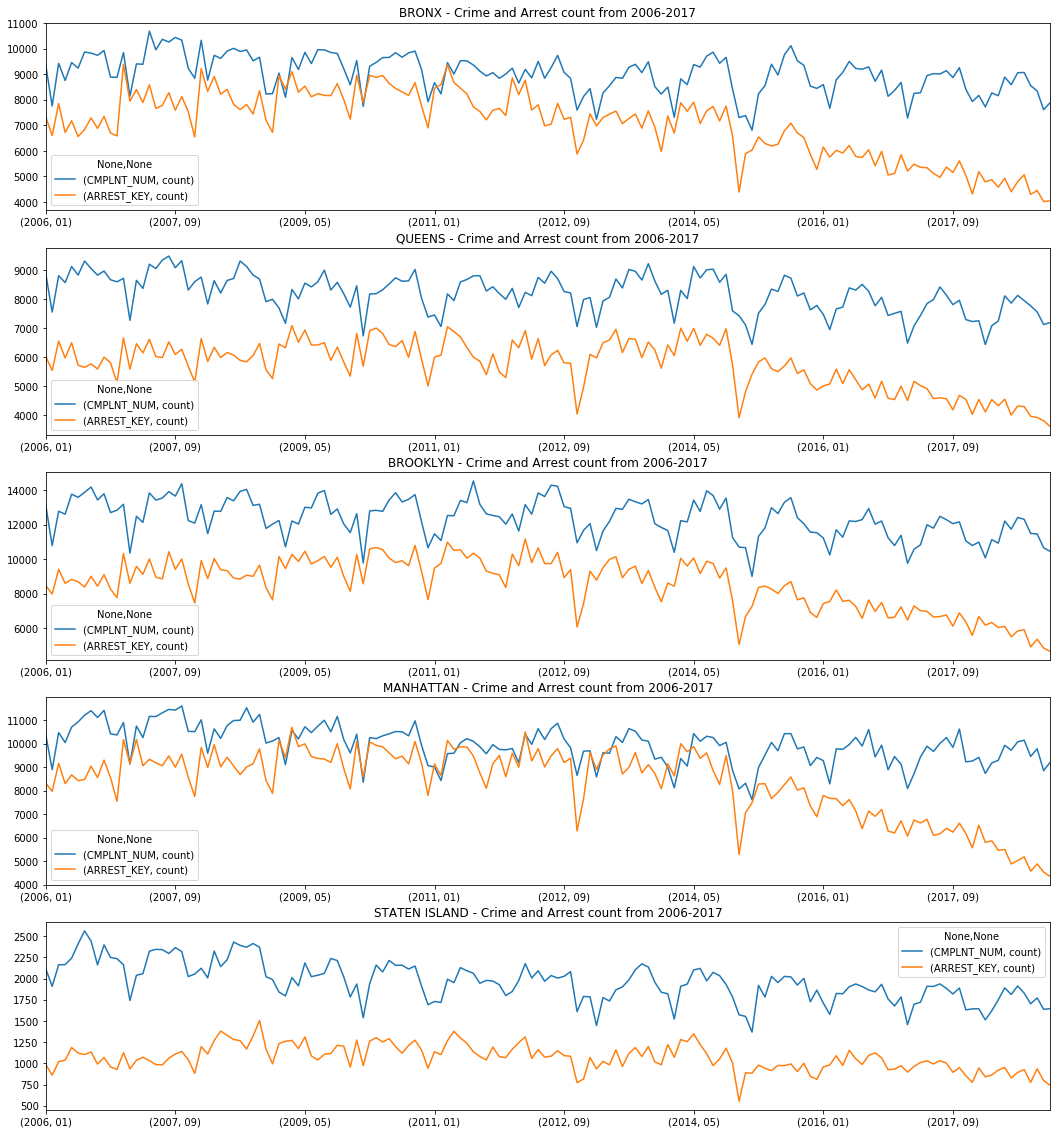

In [19]:
plot_graph(5,result,18,20,'BRONX','QUEENS','BROOKLYN','MANHATTAN','STATEN ISLAND','Crime and Arrest count from 2006-2017')


# HYPOTHESIS 2:
There exist certain types of crimes where there is prejudice agianst the victims of a particular race

In [20]:
NYC_Complaints_df = get_file(Complaints,3) #Importing only columns - VIC_RACE,OFNS_DESC,CMPLNT_NUM
NYC_Complaints_df

enter your column name 1 and press enter: VIC_RACE
enter your column name 2 and press enter: OFNS_DESC
enter your column name 3 and press enter: CMPLNT_NUM


,CMPLNT_NUM,OFNS_DESC,VIC_RACE
0,522575447,HARRASSMENT 2,BLACK HISPANIC
1,403507361,BURGLARY,ASIAN / PACIFIC ISLANDER
2,631420068,INTOXICATED & IMPAIRED DRIVING,UNKNOWN
3,995609899,PETIT LARCENY,UNKNOWN
4,480667624,FORGERY,UNKNOWN
...,...,...,...
6847939,954636350,FRAUDS,UNKNOWN
6847940,960069040,HARRASSMENT 2,BLACK
6847941,131686727,FELONY ASSAULT,WHITE
6847942,443513715,PETIT LARCENY,UNKNOWN


In [141]:
#https://worldpopulationreview.com/us-cities/new-york-city-population/
#total NYC population = 8175133    
#Creating a function to add crime per capita values
def race_percentage(row,colname)-> pd.core.series.Series:
#https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o

    '''
    This function is used to return a pandas series that has the race percentage value of all the different
    races present in NYC 
    :param row: denotes that the operation has to be performed across rows
    :param colname: Column name on which operation has to be done
    :return : a specific numeric value if a row match is found
    >>> data_dummy = {'Race':  ['AMERICAN INDIAN/ALASKAN NATIVE', 'BLACK','BLACK','WHITE','WHITE HISPANIC'],'Offense': ['FRAUDS', 'BURGLARY','HARRASSMENT 2','FORGERY','FRAUDS'],'Comp_no':[1,2,3,4,5]}
    >>> df_dummy = pd.DataFrame (data_dummy, columns = ['Race','Offense','Comp_no'])
    >>> df_dummy.apply (lambda row: race_percentage(row,'Race'), axis=1)
    0    0.0043
    1    0.2195
    2    0.2195
    3    0.3214
    4    0.1053
    dtype: float64
    
    '''


    if row[colname] == 'AMERICAN INDIAN/ALASKAN NATIVE' :
      return 0.0043
    if row[colname] == 'ASIAN / PACIFIC ISLANDER':
      return 0.14
    if row[colname] == 'BLACK' :
      return 0.2195
    if row[colname] == 'BLACK HISPANIC':
      return 0.0233
    if row[colname] == 'WHITE':
      return 0.3214
    if row[colname] == 'WHITE HISPANIC':
      return 0.1053
    if row[colname]  == 'UNKNOWN/OTHER':
      return 0.1862

In [22]:
NYC_Complaints_df.VIC_RACE.unique() # get unique values of the races in the dataframe

array(['BLACK HISPANIC', 'ASIAN / PACIFIC ISLANDER', 'UNKNOWN', 'BLACK',
       'WHITE', 'AMERICAN INDIAN/ALASKAN NATIVE', 'WHITE HISPANIC', nan,
       'OTHER'], dtype=object)

In [140]:
def offense_per_victim_race(dataframe_name)->pd.DataFrame:
    
    '''
    This function returns a dataframe that contains the information pertaining to the offense committed
    and the victims. It also takes the victim race into consideration and has a column that has normalized
    complaint numbers based on that race percentage
    
    :param dataframe_name:
    >>> sample = 'https://github.com/rahulrohri/final_project_2020Sp/blob/master/DocTest%20Dummy%20Files/offense_per_victim_race_sample.csv'
    >>> sample_df = pd.read_csv(sample)
    >>> ans = offense_per_victim_race(sample_df)
    >>> ans.iloc[0]['race_percentage']
    0.14
    '''
    dataframe_name.VIC_RACE = dataframe_name.VIC_RACE.fillna('UNKNOWN') #replacing nans with 'UNKNOWN'
    dataframe_name = dataframe_name.replace({'VIC_RACE': 'UNKNOWN'}, 'UNKNOWN/OTHER')
    dataframe_name = dataframe_name.replace({'VIC_RACE': 'OTHER'}, 'UNKNOWN/OTHER')
    #Selecting only a particular set of crimes that involve harming another human
    type_of_crime = ['HARRASSMENT 2','BURGLARY','ROBBERY','FELONY ASSAULT','SEX CRIMES','OFFENSES INVOLVING FRAUD','RAPE','THEFT-FRAUD','MURDER & NON-NEGL. MANSLAUGHTER','KIDNAPPING & RELATED OFFENSES','OFFENSES RELATED TO CHILDREN','KIDNAPPING','OTHER OFFENSES RELATED TO THEF','PETIT LARCENY','GRAND LARCENY','FORGERY','FRAUDS','ASSAULT 3 & RELATED OFFENSES']
    #https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/
    dataframe_name =dataframe_name[dataframe_name.OFNS_DESC.isin(type_of_crime)]
    #race_count = complaints_df_new.groupby(['OFNS_DESC','VIC_RACE']).agg({'CMPLNT_NUM': ['count']}).reset_index()
    dataframe_name = dataframe_name.groupby(["OFNS_DESC", "VIC_RACE"], as_index=False).count()
    dataframe_name = dataframe_name[['OFNS_DESC','VIC_RACE','CMPLNT_NUM']]
    dataframe_name.apply (lambda row: race_percentage(row,'VIC_RACE'), axis=1) #https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
    dataframe_name['race_percentage'] = dataframe_name.apply (lambda row: race_percentage(row,'VIC_RACE'), axis=1)
    #race_count_new['race_population'] = race_count_new['race_percentage']*8175133
    #race_count_new['race_population'] = race_count_new['race_population'].astype('int64')
    dataframe_name['Normalized results'] = dataframe_name['CMPLNT_NUM']/dataframe_name['race_percentage']
    dataframe_name['Normalized results'] = dataframe_name['Normalized results'].astype('int64')
    return dataframe_name




In [24]:
NYC_Complaints_df_result = offense_per_victim_race(NYC_Complaints_df)
NYC_Complaints_df_result

,OFNS_DESC,VIC_RACE,CMPLNT_NUM,race_percentage,Normalized results
0,ASSAULT 3 & RELATED OFFENSES,AMERICAN INDIAN/ALASKAN NATIVE,3724,0.0043,866046
1,ASSAULT 3 & RELATED OFFENSES,ASIAN / PACIFIC ISLANDER,46057,0.1400,328978
2,ASSAULT 3 & RELATED OFFENSES,BLACK,277634,0.2195,1264847
3,ASSAULT 3 & RELATED OFFENSES,BLACK HISPANIC,41888,0.0233,1797768
4,ASSAULT 3 & RELATED OFFENSES,UNKNOWN/OTHER,49764,0.1862,267261
...,...,...,...,...,...
119,THEFT-FRAUD,BLACK,16935,0.2195,77152
120,THEFT-FRAUD,BLACK HISPANIC,2514,0.0233,107896
121,THEFT-FRAUD,UNKNOWN/OTHER,10717,0.1862,57556
122,THEFT-FRAUD,WHITE,25314,0.3214,78761


In [25]:
NYC_Complaints_df1 = NYC_Complaints_df_result.groupby(['OFNS_DESC','VIC_RACE']).agg({'Normalized results': ['sum']})
NYC_Complaints_df1

Normalized results
                                                                           sum
OFNS_DESC                    VIC_RACE                                         
ASSAULT 3 & RELATED OFFENSES AMERICAN INDIAN/ALASKAN NATIVE             866046
                             ASIAN / PACIFIC ISLANDER                   328978
                             BLACK                                     1264847
                             BLACK HISPANIC                            1797768
                             UNKNOWN/OTHER                              267261
...                                                                        ...
THEFT-FRAUD                  BLACK                                       77152
                             BLACK HISPANIC                             107896
                             UNKNOWN/OTHER                               57556
                             WHITE                                       78761
                             WHITE HISPANIC                             111101

[124 rows x 1 columns]

In [26]:
NYC_Complaints_df_plot = NYC_Complaints_df_result.groupby(['VIC_RACE','OFNS_DESC']).agg({'Normalized results': ['sum']})
NYC_Complaints_df_plot

Normalized results
                                                                           sum
VIC_RACE                       OFNS_DESC                                      
AMERICAN INDIAN/ALASKAN NATIVE ASSAULT 3 & RELATED OFFENSES             866046
                               BURGLARY                                 320697
                               FELONY ASSAULT                           227209
                               FORGERY                                   18837
                               FRAUDS                                    27674
...                                                                        ...
WHITE HISPANIC                 PETIT LARCENY                           1198822
                               RAPE                                      57853
                               ROBBERY                                  636248
                               SEX CRIMES                               214691
                               THEFT-FRAUD                              111101

[124 rows x 1 columns]

[Text(0, 0, 'AMERICAN INDIAN/ALASKAN NATIVE'),
 Text(0, 0, 'ASIAN / PACIFIC ISLANDER'),
 Text(0, 0, 'BLACK'),
 Text(0, 0, 'BLACK HISPANIC'),
 Text(0, 0, 'UNKNOWN/OTHER'),
 Text(0, 0, 'WHITE'),
 Text(0, 0, 'WHITE HISPANIC')]

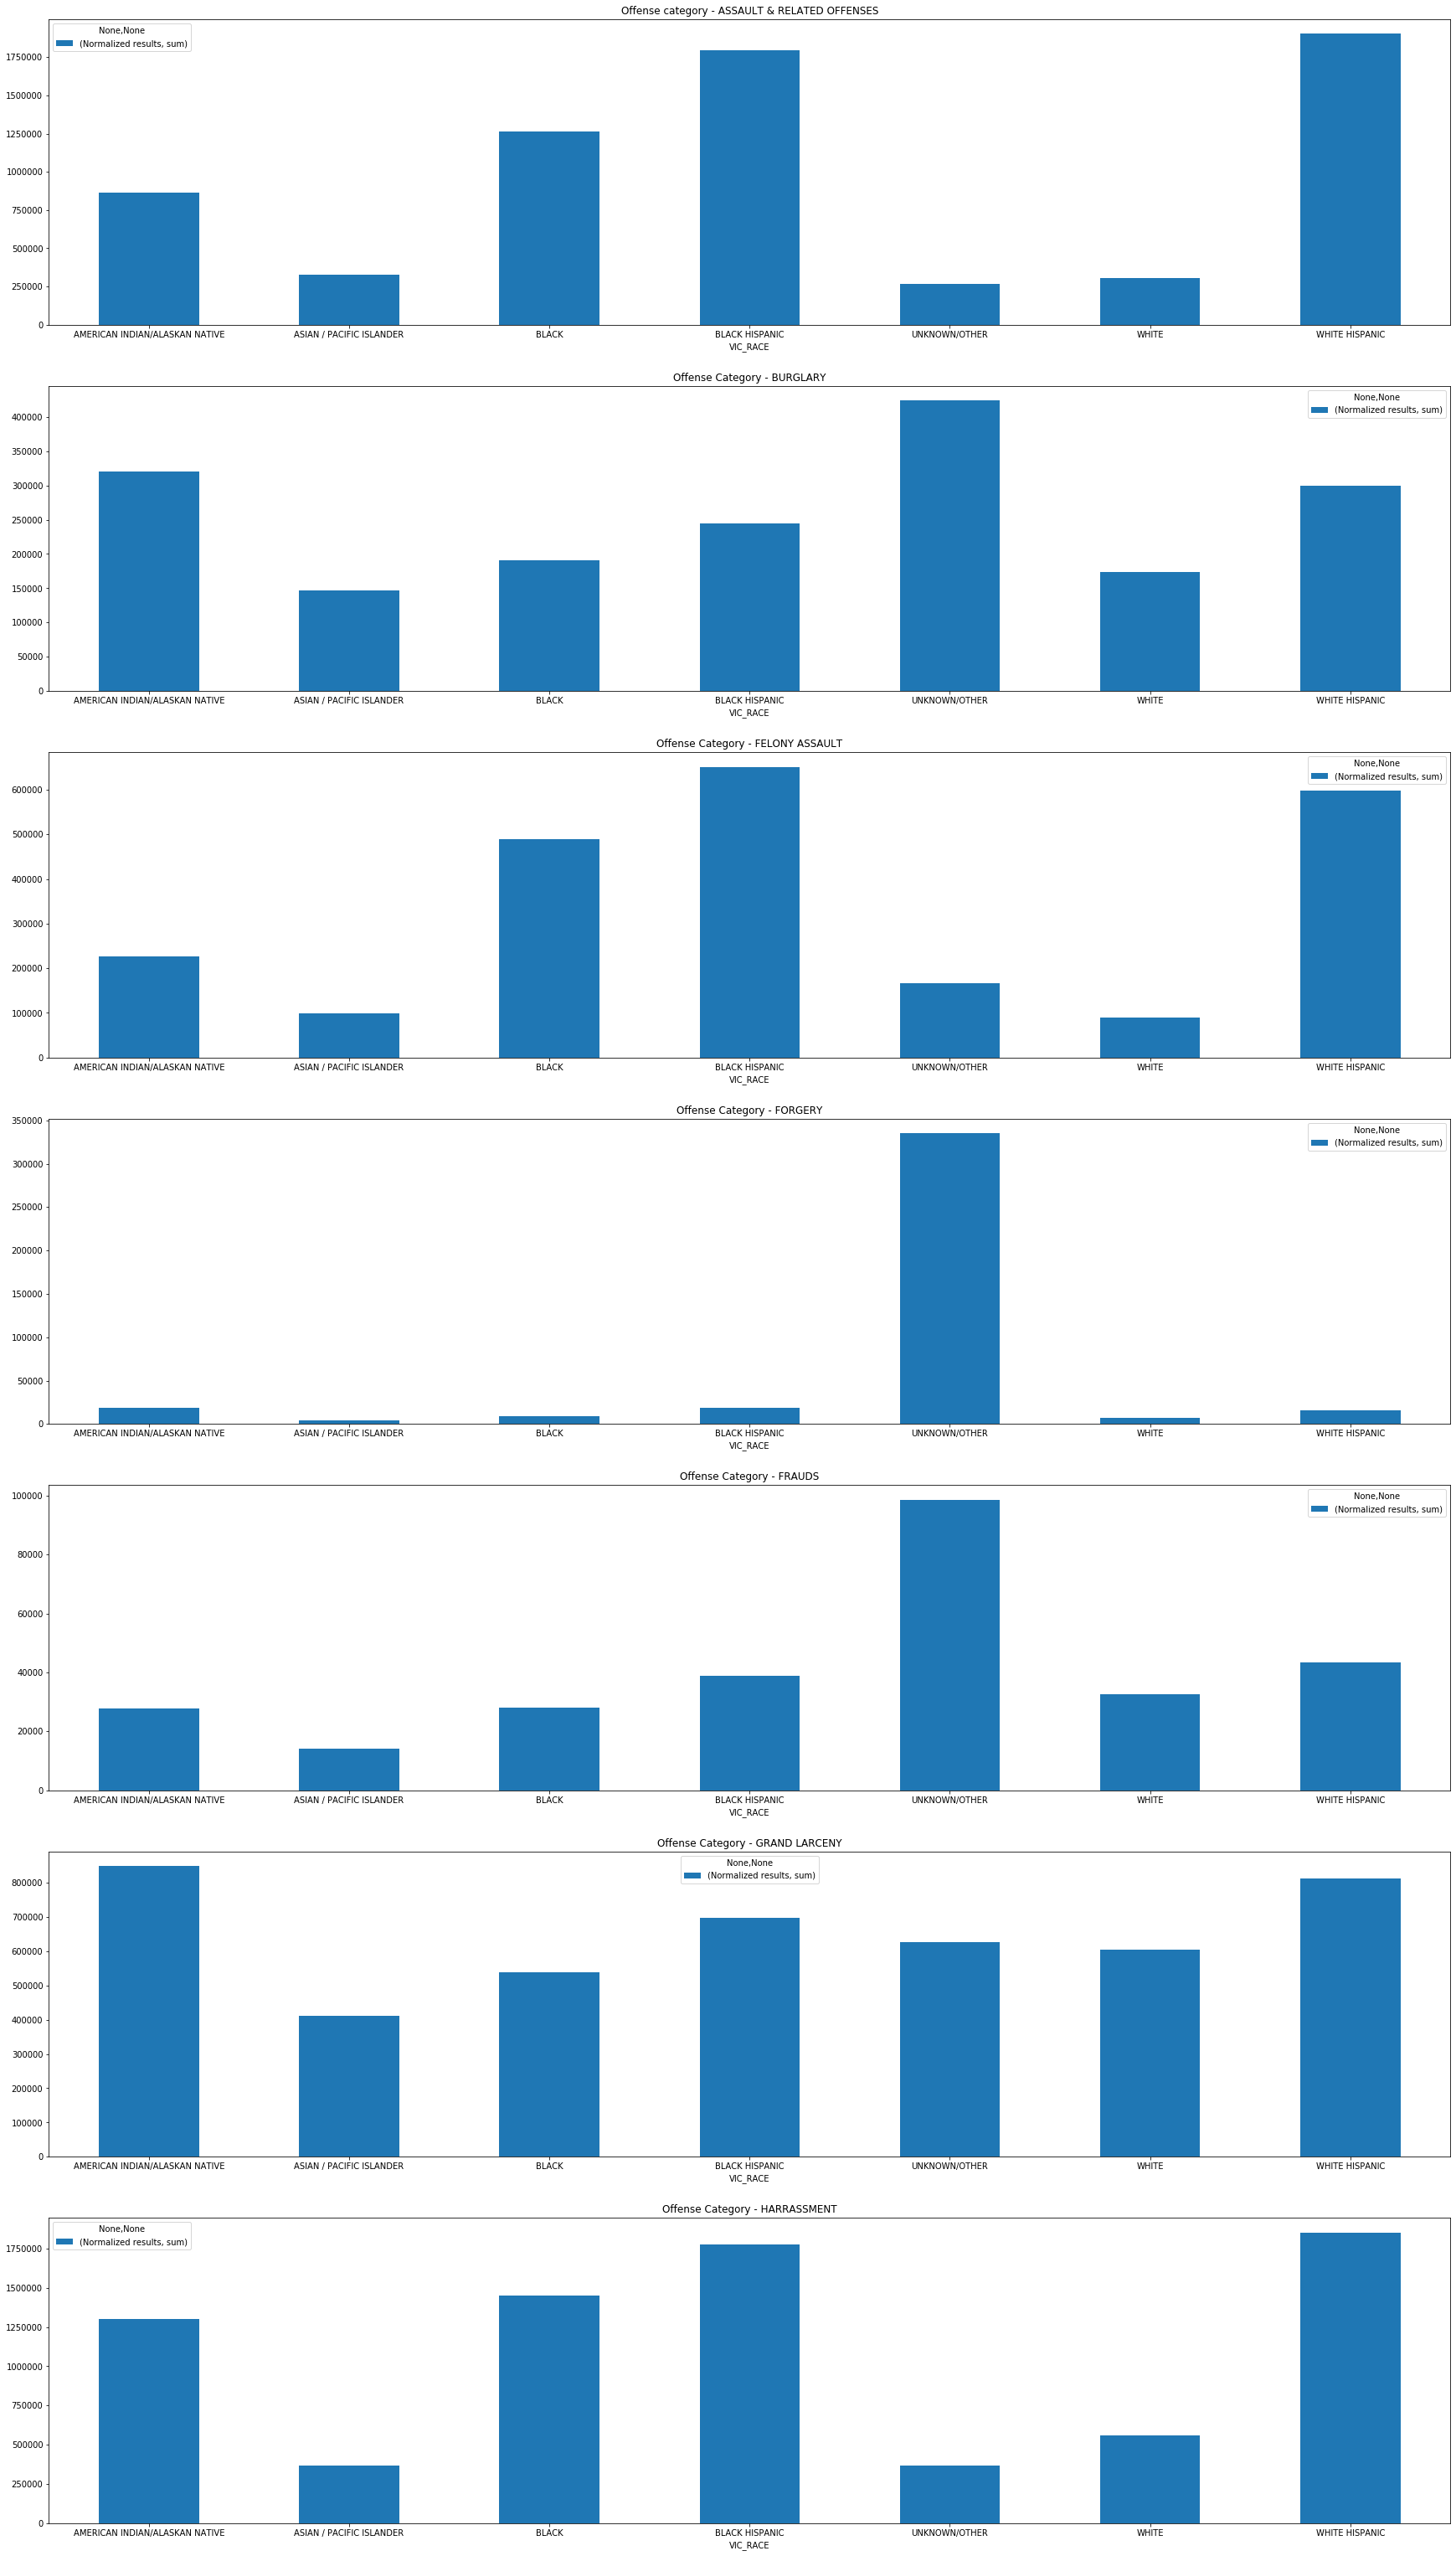

In [27]:
figure2, axis = plt.subplots(7,1,figsize=(30,55)) #https://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index

NYC_Complaints_df1.xs('ASSAULT 3 & RELATED OFFENSES').plot(kind='bar',ax=axis[0]).set_title('Offense category - ASSAULT & RELATED OFFENSES') #https://pandas.pydata.org/pandas-docs/version/0.16.0/visualization.html
NYC_Complaints_df1.xs('BURGLARY').plot(kind='bar',ax=axis[1]).set_title('Offense Category - BURGLARY') 
NYC_Complaints_df1.xs('FELONY ASSAULT').plot(kind='bar',ax=axis[2]).set_title('Offense Category - FELONY ASSAULT') 
NYC_Complaints_df1.xs('FORGERY').plot(kind='bar',ax=axis[3]).set_title('Offense Category - FORGERY') 
NYC_Complaints_df1.xs('FRAUDS').plot(kind='bar',ax=axis[4]).set_title('Offense Category - FRAUDS')
NYC_Complaints_df1.xs('GRAND LARCENY').plot(kind='bar',ax=axis[5]).set_title('Offense Category - GRAND LARCENY') 
NYC_Complaints_df1.xs('HARRASSMENT 2').plot(kind='bar',ax=axis[6]).set_title('Offense Category - HARRASSMENT') 
axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=0)
axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=0)
axis[2].set_xticklabels(axis[2].get_xticklabels(), rotation=0)
axis[3].set_xticklabels(axis[3].get_xticklabels(), rotation=0)
axis[4].set_xticklabels(axis[4].get_xticklabels(), rotation=0)
axis[5].set_xticklabels(axis[5].get_xticklabels(), rotation=0)
axis[6].set_xticklabels(axis[6].get_xticklabels(), rotation=0)

# HYPOTHESIS 3:

The population density of a neighborhood impacts the number of complaints/crimes reported there.(E.g. Is there an inverse trend of the number of crimes with the population density or not).

In [123]:
my_dir = 'C:/Users/rahul/Downloads/UIUC/Sem 2 - Spring 2020/Courses/Programing Analytics/Final Project/DataSets/' #https://github.com/iSchool-590pr/PR_Sp20_examples/blob/master/week_07/class7_pandas_pt2.ipynb
NYC_Population = my_dir + 'New_York_City_Population.csv' # Loading NYPD Arrest Data file
area_count = NYC_Complaint_Data.groupby(['BORO_NM']).count()
area_count = area_count.reset_index()
area_count

NameError: name 'NYC_Complaint_Data' is not defined

In [139]:
def population_density_details(filename) -> pd.core.frame.DataFrame:
    '''
    This function returns a dataframe which contains the population density for each neighbourhood. 
    The area in sq.km column is added manually.
    
    :param filename: The population CSV file from which dataframe needs to be created
    >>> nyc_population_sample = 'https://github.com/rahulrohri/final_project_2020Sp/blob/master/DocTest%20Dummy%20Files/New_York_City_Population_sample.csv'
    >>> ans = population_density_details(nyc_population_sample)
    >>> ans.iloc[0]['Population']
    147388
    '''
    area_population = pd.read_csv(filename)
    area_population = area_population[area_population['Year'] > 2000]
    area_population_sum = area_population.groupby(['Borough'])['Population'].sum()
    borough_pop_df = area_population_sum.to_frame().reset_index()
    borough_pop_df['Area in sq. km'] = [109.04, 183.42, 59.13, 281.09,
                                        151.18]  # https://en.wikipedia.org/wiki/Demographics_of_New_York_City
    borough_pop_df['Population Density'] = borough_pop_df['Population'] / borough_pop_df['Area in sq. km']
    borough_pop_df['Borough'] = borough_pop_df['Borough'].str.upper()
    borough_pop_df = borough_pop_df.rename(columns={"Borough": "BORO_NM"})
    borough_pop_df['Population Density'] = borough_pop_df['Population Density'].astype('int64')
    return borough_pop_df


In [125]:
Pop_density_df = population_density_details(NYC_Population)
Pop_density_df

,BORO_NM,Population,Area in sq. km,Population Density
0,BRONX,1385108,109.04,12702
1,BROOKLYN,2504700,183.42,13655
2,MANHATTAN,1585873,59.13,26820
3,QUEENS,2230722,281.09,7935
4,STATEN ISLAND,468730,151.18,3100


In [31]:
result_df = pd.merge(area_count[['BORO_NM','CMPLNT_NUM']], Pop_density_df, how='left', left_on='BORO_NM', right_on='BORO_NM')
result_df

,BORO_NM,CMPLNT_NUM,Population,Area in sq. km,Population Density
0,BRONX,1484373,1385108,109.04,12702
1,BROOKLYN,2035004,2504700,183.42,13655
2,MANHATTAN,1645015,1585873,59.13,26820
3,QUEENS,1351400,2230722,281.09,7935
4,STATEN ISLAND,321394,468730,151.18,3100


In [32]:
result_df['crime per capita'] = result_df['CMPLNT_NUM']/result_df['Population']
result_df['Population Density'] = result_df['Population Density'].astype('int64')
result_df = result_df.sort_values(by = 'Population Density',ascending = False)
result_df

,BORO_NM,CMPLNT_NUM,Population,Area in sq. km,Population Density,crime per capita
2,MANHATTAN,1645015,1585873,59.13,26820,1.037293
1,BROOKLYN,2035004,2504700,183.42,13655,0.812474
0,BRONX,1484373,1385108,109.04,12702,1.071666
3,QUEENS,1351400,2230722,281.09,7935,0.605813
4,STATEN ISLAND,321394,468730,151.18,3100,0.685670


In [138]:
def corr_coeff(col1,col2) -> np.float64:
    
    """
    :param col1: The first dataframe column you want to use for correlation calculation
    :param col2: The second dataframe column you want to use for correlation calculation
    :return: The correlation value between the two columns which is of numpy float data type
    >>> sample_csv = 'https://github.com/rahulrohri/final_project_2020Sp/blob/master/DocTest%20Dummy%20Files/Correlation_dummy.csv'
    >>> sample_df = pd.read_csv(sample_csv)
    >>> corr_coeff(sample_df['Age'],sample_df['Height(m)'])
    0.7723621551319031
    """
    
    plt.scatter(col1,col2)
    correlation = col1.corr(col2)
    #rp_corr = rp.corr_pair(col1,col2)
    return correlation

In [111]:
#calculating the correlation between Population Density and the crime per capita
#https://stackoverflow.com/questions/49350445/correlation-coefficient-of-two-columns-in-pandas-dataframe-with-corr
correlation_coeff = corr_coeff(result_df['Population Density'],result_df['crime per capita'])
type(correlation_coeff)
print('The correlation between Population Density and the crime per capita is : ',correlation_coeff)
#print('The RP correlation between Population Density and the crime per capita is : ',rp_corr)



NameError: name 'result_df' is not defined

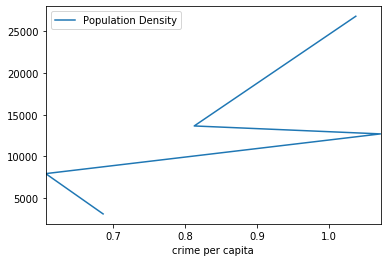

In [35]:
#https://stackoverflow.com/questions/4805048/how-to-get-different-colored-lines-for-different-plots-in-a-single-figure
ax = plt.gca() 
result_df.plot(kind='line',x='crime per capita',y='Population Density',ax=ax)
#result_df.plot(kind='line',x='BORO_NM',y='crime per capita', color='red', ax=ax)
plt.show()

# HYPOTHESIS 4:

There exists a trend between the type of crimes reported in NYC and the neighborhood they occurred in. (e.g. There are a greater number of theft cases in Brooklyn than any other region)

In [37]:
NYC_Complaints_df = get_file(Complaints,3)  # importing only columns -OFNS_DESC, BORO_NM,CMPLNT_NUM,
NYC_Complaints_df.head() 

enter your column name 1 and press enter: OFNS_DESC
enter your column name 2 and press enter: BORO_NM
enter your column name 3 and press enter: CMPLNT_NUM


,CMPLNT_NUM,OFNS_DESC,BORO_NM
0,522575447,HARRASSMENT 2,BRONX
1,403507361,BURGLARY,BROOKLYN
2,631420068,INTOXICATED & IMPAIRED DRIVING,QUEENS
3,995609899,PETIT LARCENY,BROOKLYN
4,480667624,FORGERY,MANHATTAN


In [137]:
#Selecting only a particular set of crimes that involve harming another human
def get_crime_results(dfname) -> pd.core.frame.DataFrame:
    
    '''
    This function returns a dataframe which has the complaints per capita for each borough and offense
    
    :param dfname: NYC complaints dataframe on which operations have to be performed
   
    >>> sample_NYC_csv = 'https://github.com/rahulrohri/final_project_2020Sp/blob/master/DocTest%20Dummy%20Files/NYC_get_crime.csv'
    >>> sample_NYC_dframe = pd.read_csv(sample_NYC_csv)
    >>> Pop_density_csv = 'https://github.com/rahulrohri/final_project_2020Sp/blob/master/DocTest%20Dummy%20Files/Dummy_pop_density.csv'
    >>> Pop_density_df = pd.read_csv(Pop_density_csv)
    >>> ans = get_crime_results(sample_NYC_dframe)
    >>> ans.iloc[0]['Population']
    2504700
    '''
    type_of_crime = ['HARRASSMENT 2','BURGLARY','ROBBERY','FELONY ASSAULT','SEX CRIMES','OFFENSES INVOLVING FRAUD','RAPE','THEFT-FRAUD','MURDER & NON-NEGL. MANSLAUGHTER','KIDNAPPING & RELATED OFFENSES','OFFENSES RELATED TO CHILDREN','KIDNAPPING','OTHER OFFENSES RELATED TO THEF','PETIT LARCENY','GRAND LARCENY','FORGERY','FRAUDS','ASSAULT 3 & RELATED OFFENSES']
    #https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/
    dfname = dfname[dfname.OFNS_DESC.isin(type_of_crime)]
    #complaints_df_new.OFNS_DESC.unique()
    g1 = dfname.groupby(["OFNS_DESC", "BORO_NM"], as_index=False).count()
    g1 = g1[["OFNS_DESC","BORO_NM","CMPLNT_NUM"]]
    #merging with population density dataframe to add necessary density columns
    Crime_result_df = pd.merge(g1, Pop_density_df, how='left', left_on='BORO_NM', right_on='BORO_NM')
    #creating the per capita values by dividing complaint numbers and population
    Crime_result_df['complaints per capita'] = Crime_result_df['CMPLNT_NUM']/Crime_result_df['Population']
    Crime_result_df['complaints per capita'] = Crime_result_df['complaints per capita'].astype('float64')
    return Crime_result_df

In [39]:
Crime_result_dataframe = get_crime_results(NYC_Complaints_df)
Crime_result_dataframe.head()

In [40]:
g2 = Crime_result_dataframe.groupby(['BORO_NM','OFNS_DESC']).agg({'complaints per capita': ['sum']})
g2
#g1.sort_values(['complaints per capita'], ascending=False)

complaints per capita
                                                             sum
BORO_NM       OFNS_DESC                                         
BRONX         ASSAULT 3 & RELATED OFFENSES              0.128541
              BURGLARY                                  0.030452
              FELONY ASSAULT                            0.050381
              FORGERY                                   0.008570
              FRAUDS                                    0.005214
...                                                          ...
STATEN ISLAND PETIT LARCENY                             0.104713
              RAPE                                      0.001621
              ROBBERY                                   0.012094
              SEX CRIMES                                0.005986
              THEFT-FRAUD                               0.009432

[85 rows x 1 columns]

In [41]:
g3 = Crime_result_dataframe.groupby(['OFNS_DESC','BORO_NM']).agg({'complaints per capita': ['sum']})
g3
#g1.sort_values(['complaints per capita'], ascending=False)

complaints per capita
                                                             sum
OFNS_DESC                    BORO_NM                            
ASSAULT 3 & RELATED OFFENSES BRONX                      0.128541
                             BROOKLYN                   0.089553
                             MANHATTAN                  0.087838
                             QUEENS                     0.064917
                             STATEN ISLAND              0.066360
...                                                          ...
THEFT-FRAUD                  BRONX                      0.008672
                             BROOKLYN                   0.008123
                             MANHATTAN                  0.013618
                             QUEENS                     0.006597
                             STATEN ISLAND              0.009432

[85 rows x 1 columns]

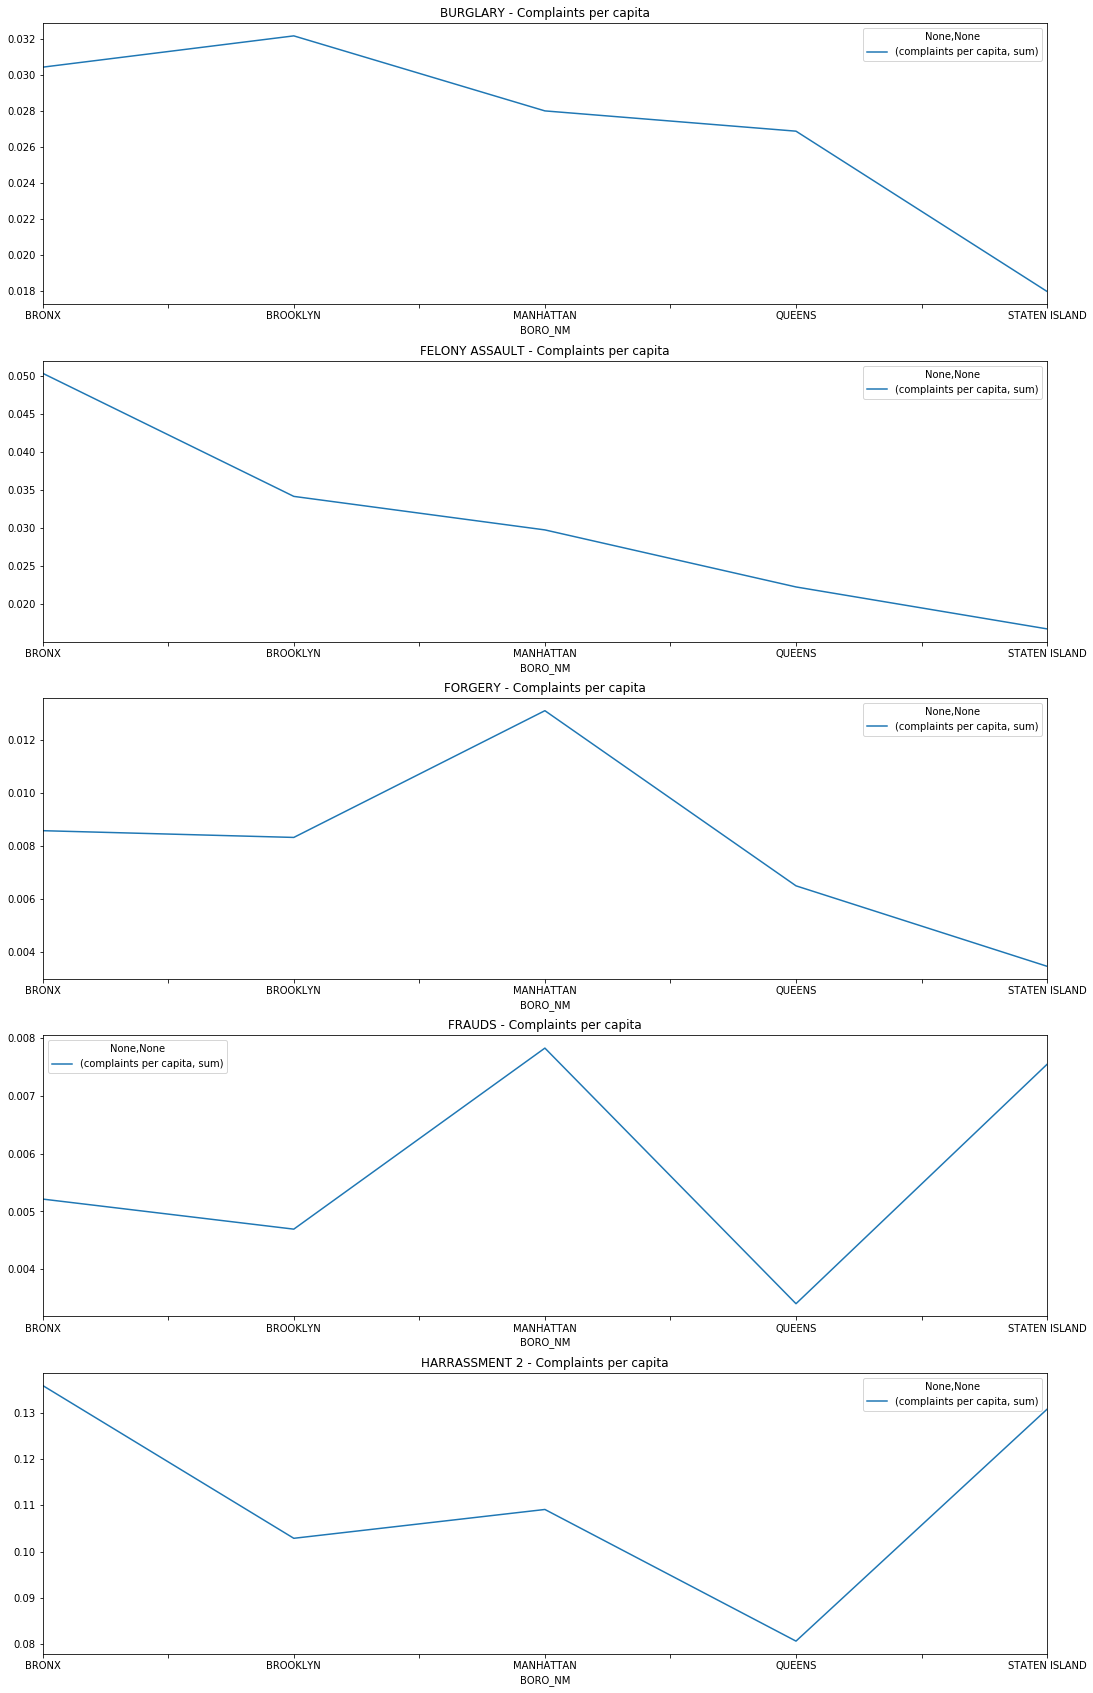

In [42]:
plot_graph(5,g3,18,30,'BURGLARY','FELONY ASSAULT','FORGERY','FRAUDS','HARRASSMENT 2','Complaints per capita')

# Hypothesis 5:
The population density is directly proportional the average response time taken by an emergency unit to respond to that incident. (E.g. Are the instances of the vehicle taking more time to reach the emergency spot greater in densely populated neighborhoods?)

In [43]:
EMS_Data = get_file(EMS_incident,3) # only import columns INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_DATETIME,BOROUGH
EMS_Data.head()

enter your column name 1 and press enter: INCIDENT_RESPONSE_SECONDS_QY
enter your column name 2 and press enter: INCIDENT_DATETIME
enter your column name 3 and press enter: BOROUGH


,INCIDENT_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,BOROUGH
0,01/01/2008 12:00:01 AM,NaN,BROOKLYN
1,01/01/2008 12:00:05 AM,NaN,BROOKLYN
2,01/01/2008 12:00:06 AM,1657.0,QUEENS
3,01/01/2008 12:00:07 AM,NaN,BROOKLYN
4,01/01/2008 12:00:09 AM,NaN,BROOKLYN


In [44]:
extract_year_month(EMS_Data,'INCIDENT_DATETIME','Incident_Month','Incident_Year')

,INCIDENT_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,BOROUGH,Incident_Month,Incident_Year
0,01/01/2008 12:00:01 AM,NaN,BROOKLYN,01,2008
1,01/01/2008 12:00:05 AM,NaN,BROOKLYN,01,2008
2,01/01/2008 12:00:06 AM,1657.0,QUEENS,01,2008
3,01/01/2008 12:00:07 AM,NaN,BROOKLYN,01,2008
4,01/01/2008 12:00:09 AM,NaN,BROOKLYN,01,2008
...,...,...,...,...,...
16401658,12/31/2019 11:58:32 PM,259.0,RICHMOND / STATEN ISLAND,12,2019
16401659,12/31/2019 11:58:50 PM,1189.0,RICHMOND / STATEN ISLAND,12,2019
16401660,12/31/2019 11:59:02 PM,248.0,QUEENS,12,2019
16401661,12/31/2019 11:59:29 PM,318.0,QUEENS,12,2019


In [136]:
#EMS_incident_response_avg = EMS_Data[['INCIDENT_RESPONSE_SECONDS_QY','BOROUGH']]
def EMS_details(dfname) -> pd.DataFrame:
    
    '''
    This function returns a dataframe containing details of the incident response time, incident datetime, borough
    There are also details pertaining to the population density , which is a result of the 2 dataframes being joined
    
    :param dfname: EMS dataframe to be passed as input
    >>> ems_sample_csv = 'https://github.com/rahulrohri/final_project_2020Sp/blob/master/DocTest%20Dummy%20Files/EMS_incidentResponse.csv'
    >>> ems_sample_df = pd.read_csv(ems_sample_csv)
    >>> Pop_density_csv = 'https://github.com/rahulrohri/final_project_2020Sp/blob/master/DocTest%20Dummy%20Files/Dummy_pop_density.csv'
    >>> Pop_density_df = pd.read_csv(Pop_density_csv)
    >>> ans = EMS_details(ems_sample_df)
    >>> ans.iloc[0]['Population']
    231690
    '''
    EMS_incident_response_avg = dfname.dropna()
    EMS_incident_response_avg = EMS_incident_response_avg.groupby(['BOROUGH','Incident_Year','Incident_Month'],as_index=False)['INCIDENT_RESPONSE_SECONDS_QY'].mean()
    EMS_incident_response_avg['INCIDENT_RESPONSE_SECONDS_QY']=EMS_incident_response_avg['INCIDENT_RESPONSE_SECONDS_QY'].astype('int64')
    EMS_incident_response_avg['AVG_INCIDENT_RESPONSE (Minutes)'] = EMS_incident_response_avg['INCIDENT_RESPONSE_SECONDS_QY']/60
    #Renaming the index to Staten Island
    EMS_incident_response_avg = EMS_incident_response_avg.replace({'BOROUGH': 'RICHMOND / STATEN ISLAND'}, 'STATEN ISLAND')
    result_inc_resp_df = pd.merge(Pop_density_df, EMS_incident_response_avg, how='inner', left_on='BORO_NM', right_on='BOROUGH')
    return result_inc_resp_df

In [46]:
EMS_Result_df = EMS_details(EMS_Data)
EMS_Result_df.head()

,BORO_NM,Population,Area in sq. km,Population Density,BOROUGH,Incident_Year,Incident_Month,INCIDENT_RESPONSE_SECONDS_QY,AVG_INCIDENT_RESPONSE (Minutes)
0,BRONX,1385108,109.04,12702,BRONX,2008,01,469,7.816667
1,BRONX,1385108,109.04,12702,BRONX,2008,02,548,9.133333
2,BRONX,1385108,109.04,12702,BRONX,2008,03,493,8.216667
3,BRONX,1385108,109.04,12702,BRONX,2008,04,463,7.716667
4,BRONX,1385108,109.04,12702,BRONX,2008,05,504,8.400000


The correlation coefficient between Population Density and the Incident response time is :  0.46395462787006264


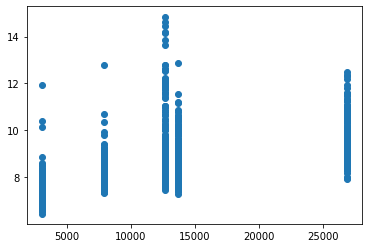

In [47]:
#calculating the correlation between Population Density and the incident response time
#https://stackoverflow.com/questions/49350445/correlation-coefficient-of-two-columns-in-pandas-dataframe-with-corr
correlation_coeff = corr_coeff(EMS_Result_df['Population Density'],EMS_Result_df['AVG_INCIDENT_RESPONSE (Minutes)'])
print('The correlation coefficient between Population Density and the Incident response time is : ',correlation_coeff)

In [48]:
g4 = EMS_Result_df.groupby(['BORO_NM','Incident_Year','Incident_Month']).agg({'AVG_INCIDENT_RESPONSE (Minutes)': ['sum']})
g4

AVG_INCIDENT_RESPONSE (Minutes)
                                                                       sum
BORO_NM       Incident_Year Incident_Month                                
BRONX         2008          01                                    7.816667
                            02                                    9.133333
                            03                                    8.216667
                            04                                    7.716667
                            05                                    8.400000
...                                                                    ...
STATEN ISLAND 2019          08                                    8.066667
                            09                                    8.300000
                            10                                    7.583333
                            11                                    8.000000
                            12                                    8.066667

[720 rows x 1 columns]

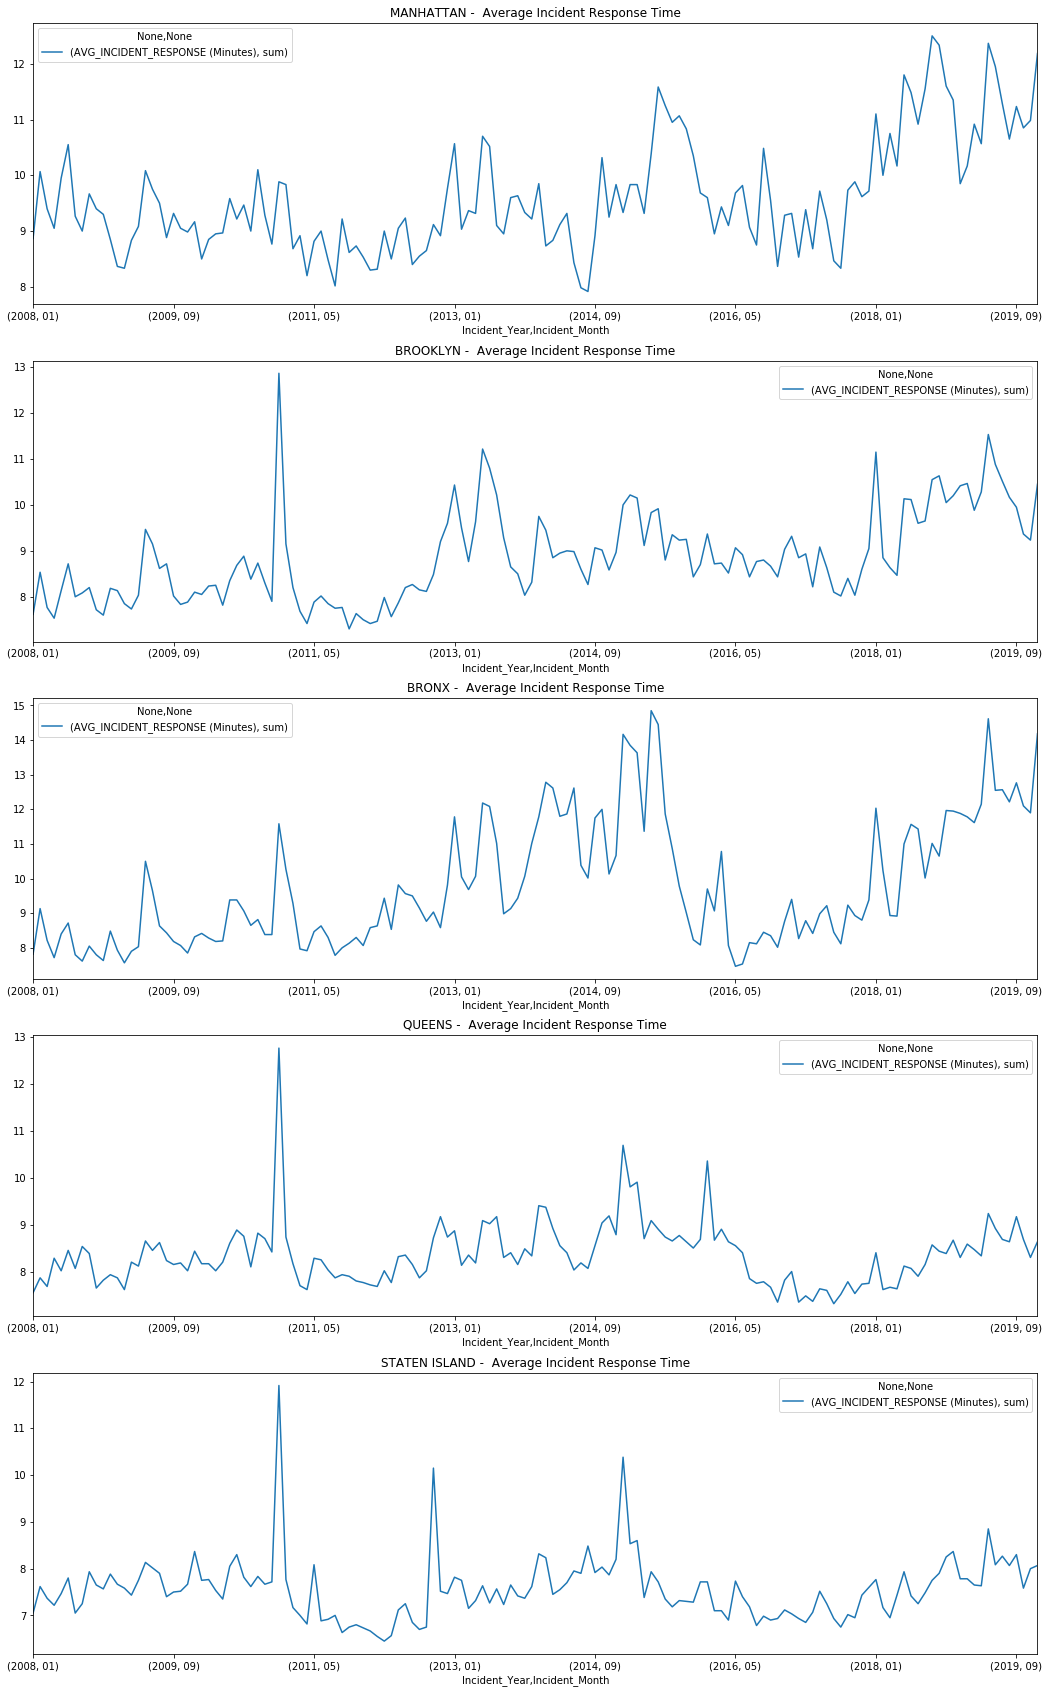

In [49]:
plot_graph(5,g4,18,30,'MANHATTAN','BROOKLYN','BRONX','QUEENS','STATEN ISLAND',' Average Incident Response Time')

Trying:
    ems_sample_csv = 'https://github.com/rahulrohri/final_project_2020Sp/blob/master/DocTest%20Dummy%20Files/EMS_incidentResponse.csv'
Expecting nothing
ok
Trying:
    ems_sample_df = pd.read_csv(ems_sample_csv)
Expecting nothing
**********************************************************************
File "__main__", line 9, in __main__.EMS_details
Failed example:
    ems_sample_df = pd.read_csv(ems_sample_csv)
Exception raised:
    Traceback (most recent call last):
      File "C:\Users\rahul\Anaconda3\lib\doctest.py", line 1329, in __run
        compileflags, 1), test.globs)
      File "<doctest __main__.EMS_details[1]>", line 1, in <module>
        ems_sample_df = pd.read_csv(ems_sample_csv)
      File "C:\Users\rahul\Anaconda3\lib\site-packages\pandas\io\parsers.py", line 702, in parser_f
        return _read(filepath_or_buffer, kwds)
      File "C:\Users\rahul\Anaconda3\lib\site-packages\pandas\io\parsers.py", line 435, in _read
        data = parser.read(nrows)
      File 

TestResults(failed=14, attempted=43)

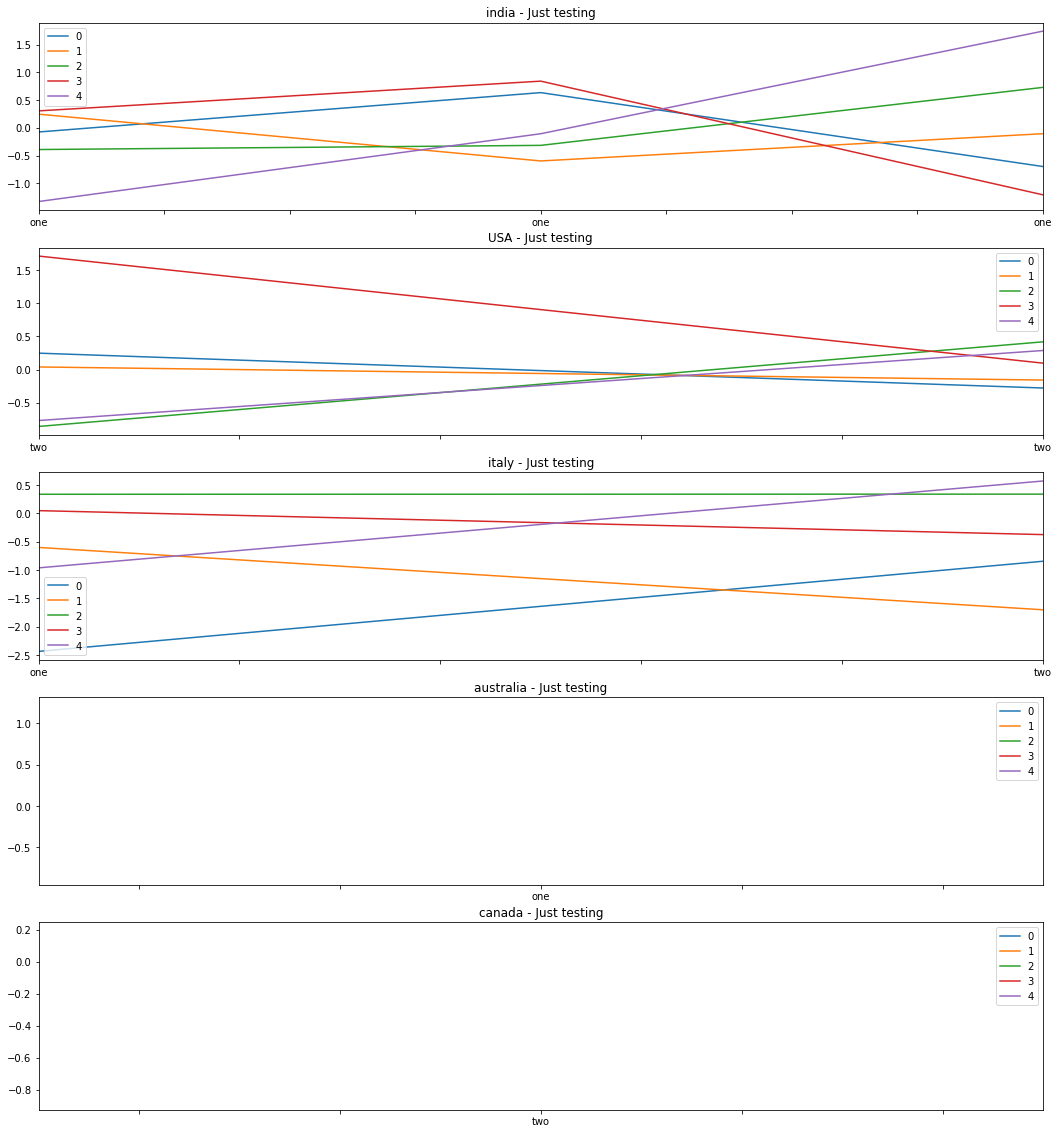

In [144]:
import doctest
doctest.testmod(verbose=True)